In [ ]:
import zipfile
import pandas as pd
import os

# Path to the zip file
zip_path = '/content/House dataset.zip'
# Directory to extract the contents
extract_path = '/content/House_dataset/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find the CSV file in the extracted directory (assuming there's only one CSV)
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

if csv_files:
    csv_path = os.path.join(extract_path, csv_files[0])
    # Load the dataset
    df = pd.read_csv(csv_path)
    display(df.head())
else:
    print("No CSV file found in the extracted directory.")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Let's show all columns with missing data as well:
df[df.isnull().any(axis=1)] # any missing data in columns

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# function that imputes a dataframe
def impute_knn(df):

    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan

    for col in cols_nan:
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])

    return pd.concat([ldf,ldf_putaside],axis=1)

# Test the function with your DataFrame 'df'
# imputed_df = impute_knn(df.copy()) # Make a copy to avoid modifying the original DataFrame
# display(imputed_df.head())

In [ ]:
# Call function that imputes missing data
df2 = impute_knn(df)
# looks like we have a full feature matrix
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  date           4600 non-null   object 
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
from sklearn.model_selection import train_test_split

# 70/30 Split should do
trdata,tedata = train_test_split(df2,test_size=0.3,random_state=43)

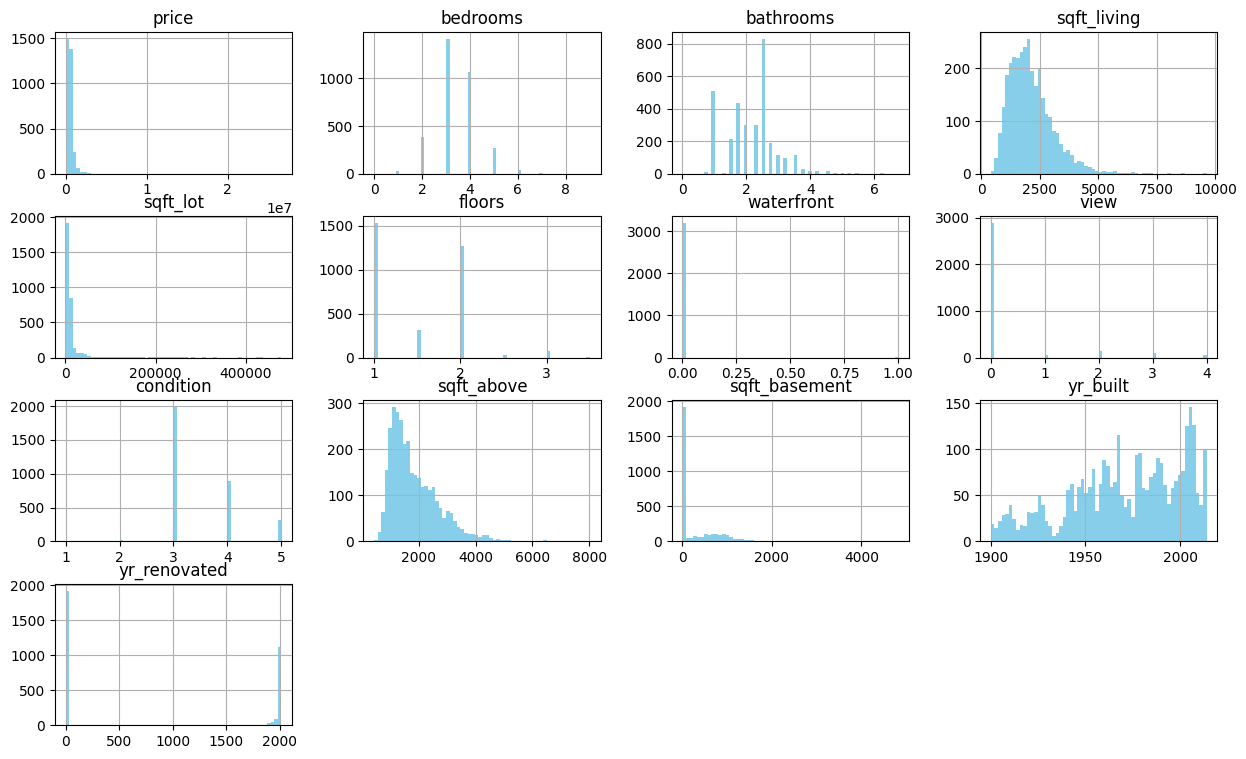

In [ ]:
import matplotlib.pyplot as plt

color1 = 'skyblue'  # Define a color for the histogram

trdata.hist(bins=60, figsize=(15,9),color=color1);plt.show()

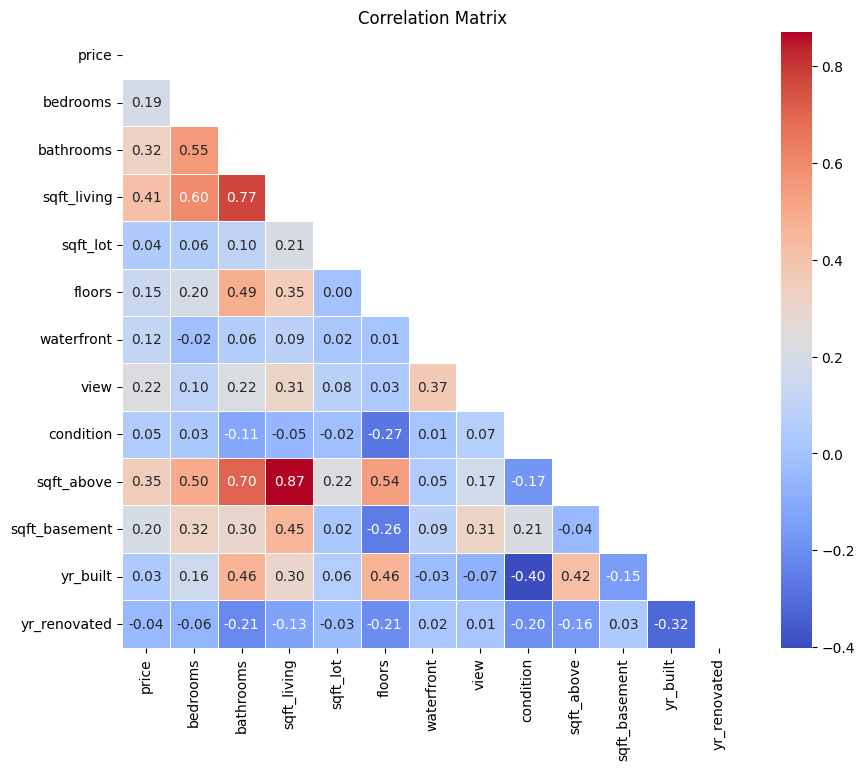

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def corrMat(df):
    """
    Plots a masked correlation matrix for a DataFrame.

    Args:
        df: pandas DataFrame
    """
    # Exclude non-numeric columns like 'date' before calculating correlation
    numeric_df = df.select_dtypes(include=np.number)
    corr = numeric_df.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices(mask.shape[0], k=0)] = True # Corrected function call
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, ax=ax)
    plt.title('Correlation Matrix')
    plt.show()

corrMat(trdata)

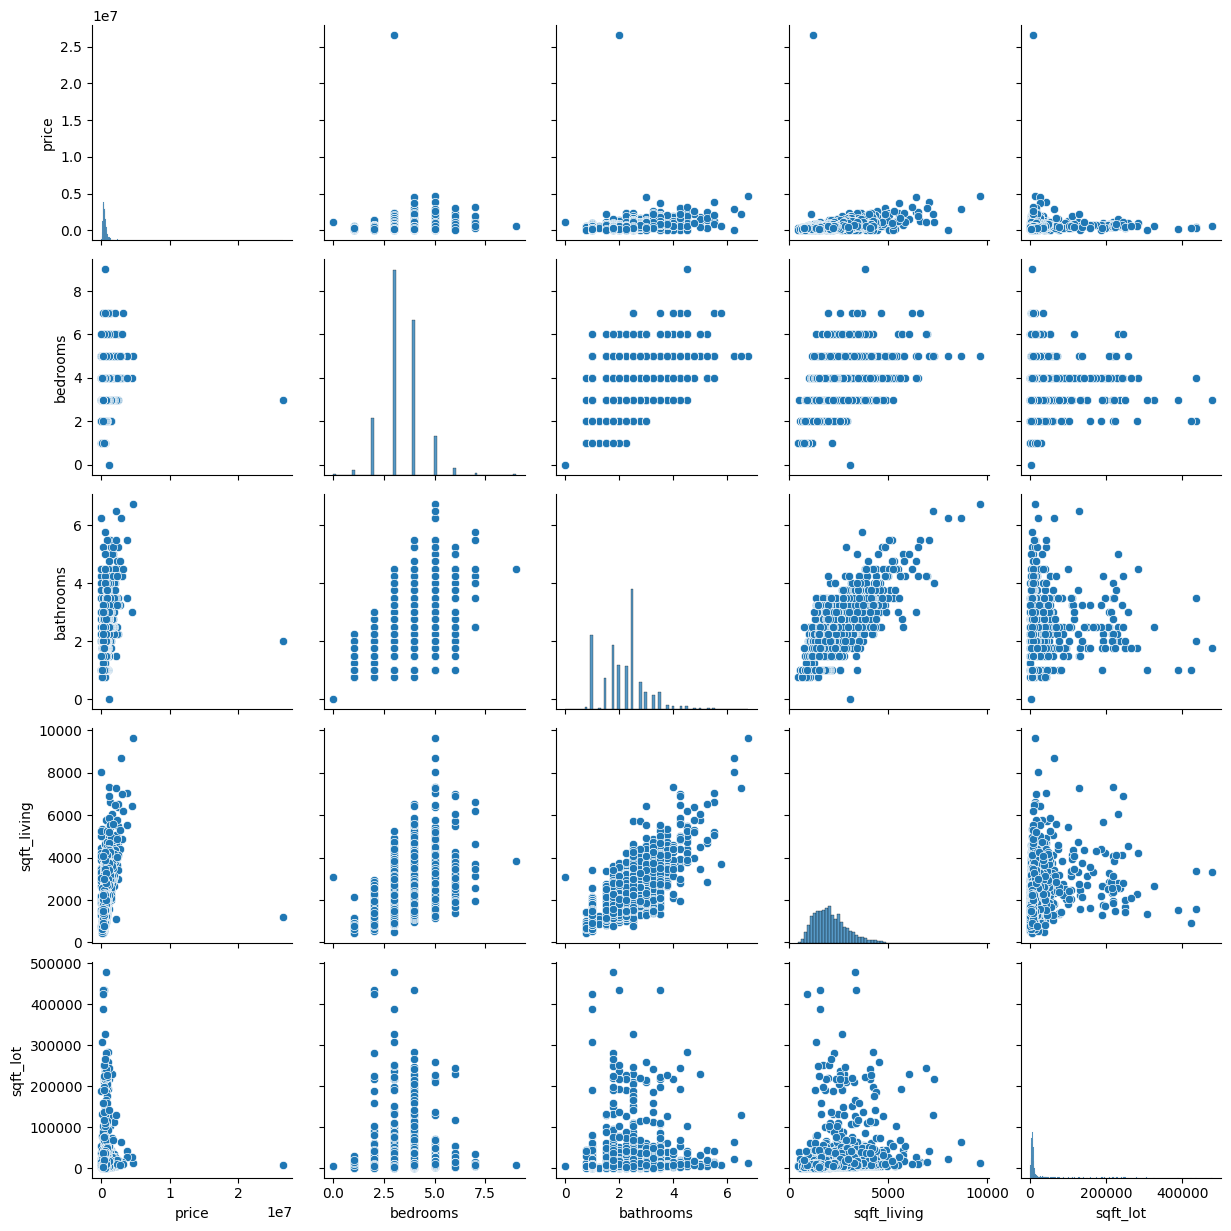

In [ ]:
# Seaborn get a little slow, let's plot some interesting features
tlist = ['price','bedrooms','bathrooms','sqft_living','sqft_lot'] # Using relevant columns from the current dataset
import seaborn as sns
sns.pairplot(trdata[tlist])

In [ ]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 1167 to 3392
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3220 non-null   float64
 1   bedrooms       3220 non-null   float64
 2   bathrooms      3220 non-null   float64
 3   sqft_living    3220 non-null   int64  
 4   sqft_lot       3220 non-null   int64  
 5   floors         3220 non-null   float64
 6   waterfront     3220 non-null   int64  
 7   view           3220 non-null   int64  
 8   condition      3220 non-null   int64  
 9   sqft_above     3220 non-null   int64  
 10  sqft_basement  3220 non-null   int64  
 11  yr_built       3220 non-null   int64  
 12  yr_renovated   3220 non-null   int64  
 13  date           3220 non-null   object 
 14  street         3220 non-null   object 
 15  city           3220 non-null   object 
 16  statezip       3220 non-null   object 
 17  country        3220 non-null   object 
dtypes: float64

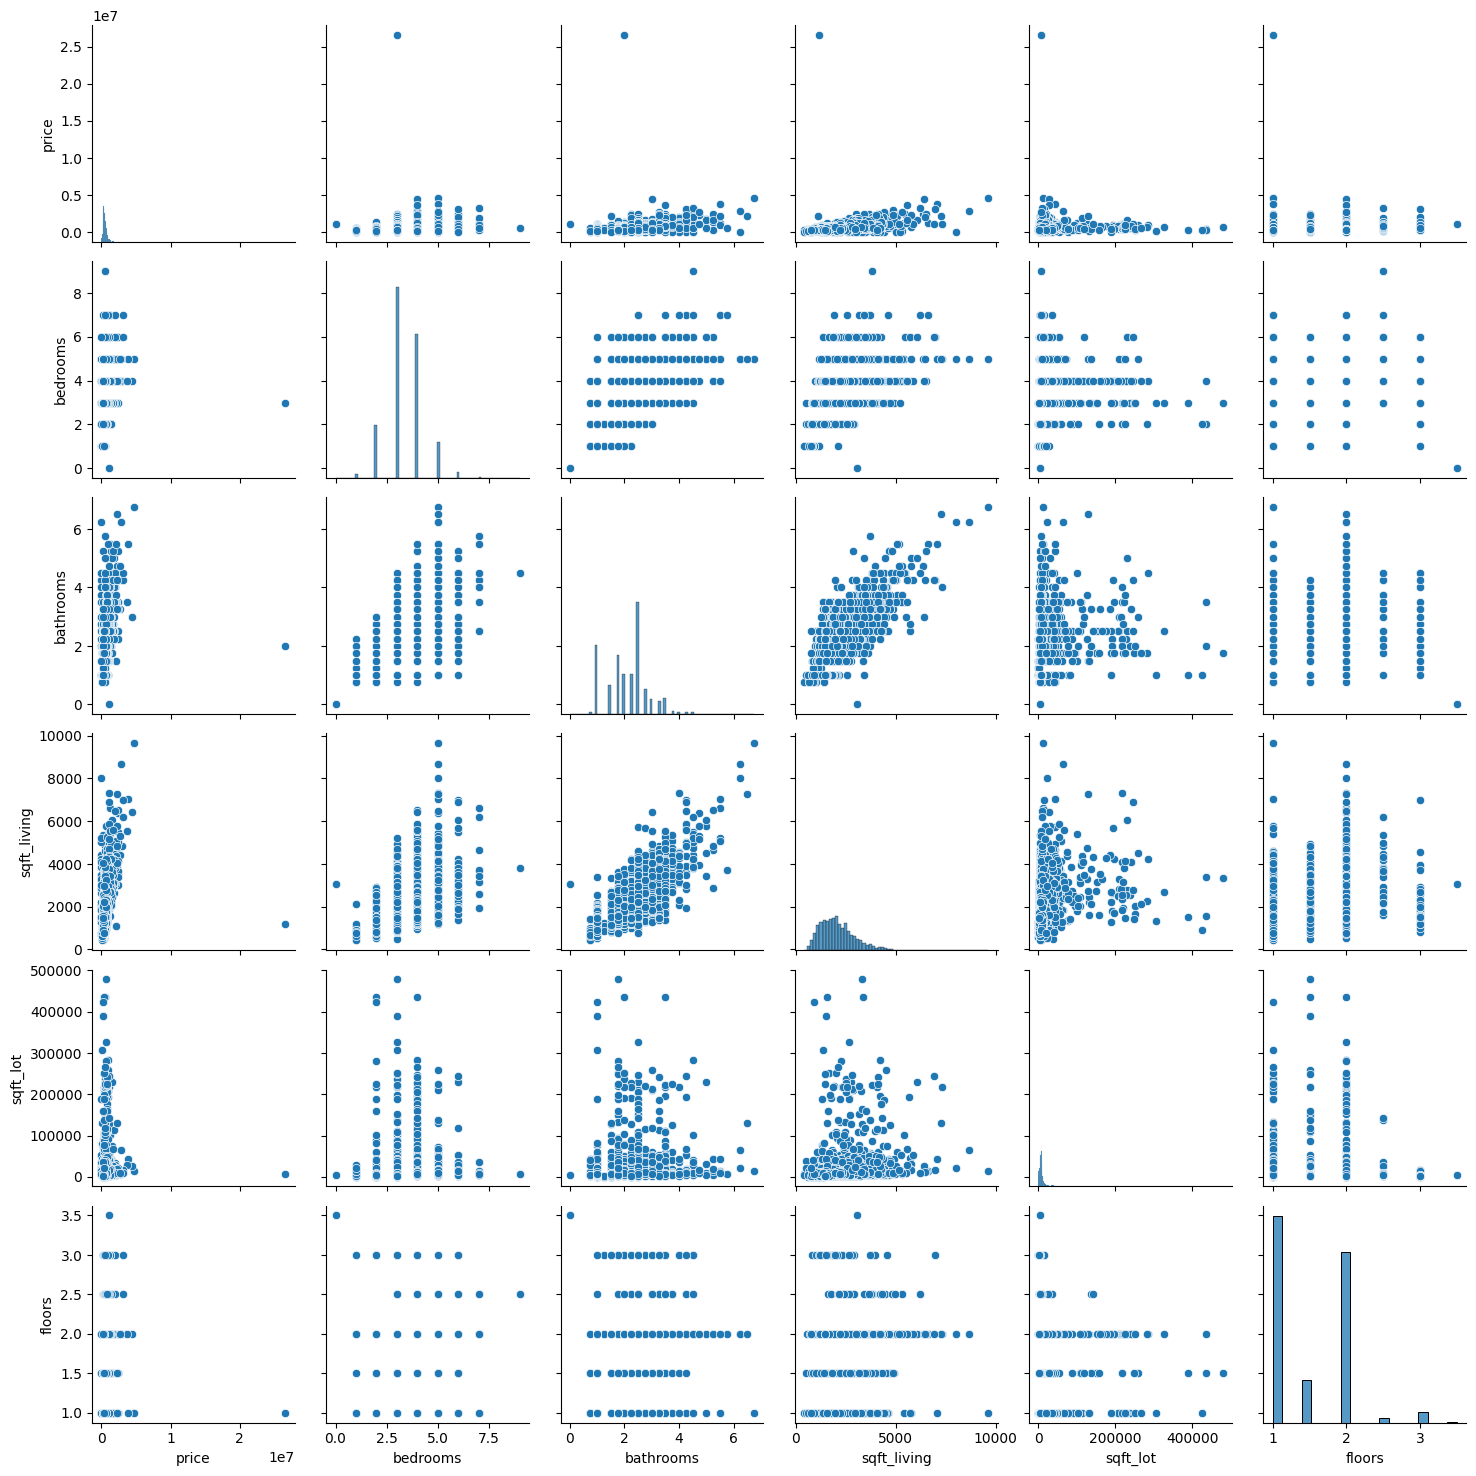

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using a selection of relevant numerical columns from the current dataset
tlist = ['price','bedrooms','bathrooms','sqft_living','sqft_lot', 'floors']

sns.pairplot(trdata[tlist])
plt.show()

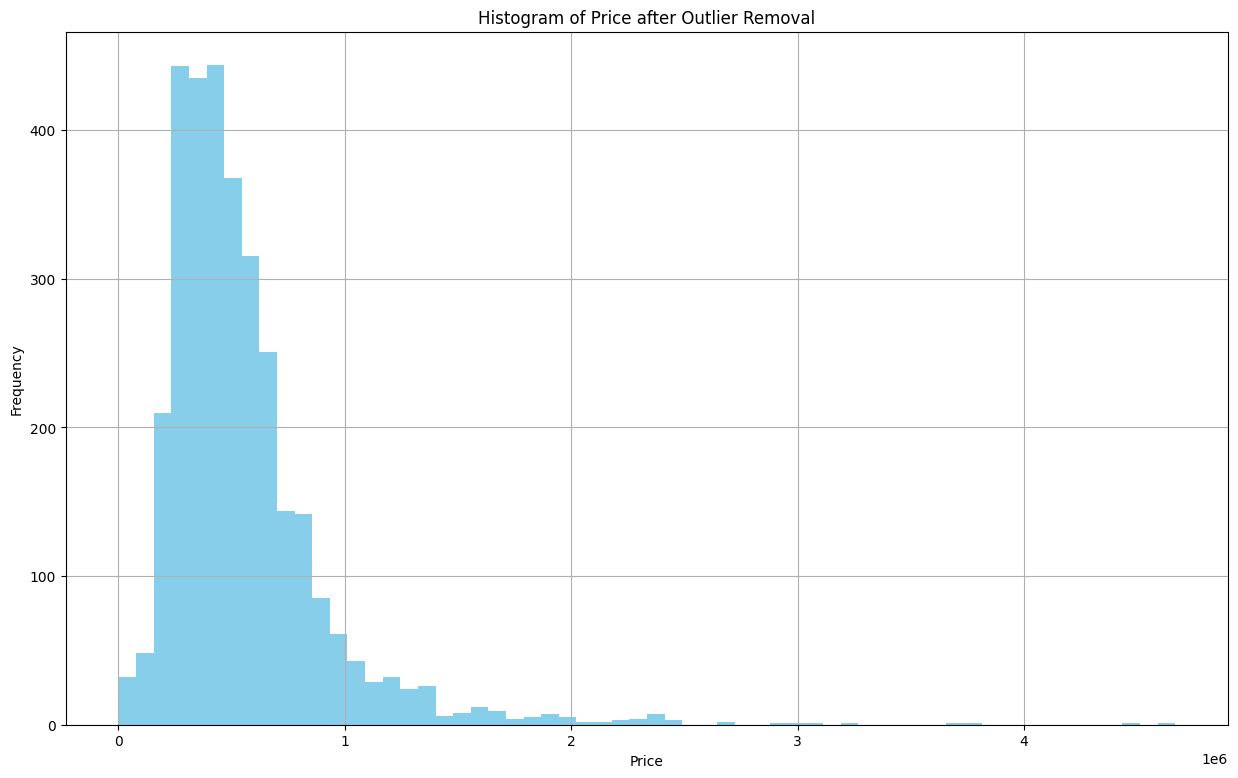

In [ ]:
# trdata_upd : training data w/ removed outliers
maxval_price = trdata['price'].max() # get the maximum price value
trdata_upd = trdata[trdata['price'] != maxval_price]
tedata_upd = tedata[tedata['price'] != maxval_price]

# Plot histogram of the updated training data's price column
trdata_upd.hist(column='price', bins=60, figsize=(15,9), color=color1)
plt.title('Histogram of Price after Outlier Removal')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Create new features
trdata_upd['bedrooms_per_sqft'] = trdata_upd['bedrooms'] / trdata_upd['sqft_living']
trdata_upd['total_rooms'] = trdata_upd['bedrooms'] + trdata_upd['bathrooms']

tedata_upd['bedrooms_per_sqft'] = tedata_upd['bedrooms'] / tedata_upd['sqft_living']
tedata_upd['total_rooms'] = tedata_upd['bedrooms'] + tedata_upd['bathrooms']

display(trdata_upd.head())

/tmp/ipython-input-19-769070693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trdata_upd['bedrooms_per_sqft'] = trdata_upd['bedrooms'] / trdata_upd['sqft_living']
/tmp/ipython-input-19-769070693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trdata_upd['total_rooms'] = trdata_upd['bedrooms'] + trdata_upd['bathrooms']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,date,street,city,statezip,country,bedrooms_per_sqft,total_rooms
1167,389950.0,4.0,2.50,3140,8060,2.0,0,0,3,3140,0,1991,0,2014-05-22 00:00:00,32800 7th Ave SW,Federal Way,WA 98023,USA,0.001274,6.50
1178,180000.0,2.0,1.00,1400,4500,1.0,0,0,3,900,500,1922,2008,2014-05-22 00:00:00,309 Hardie Ave NW,Renton,WA 98057,USA,0.001429,3.00
4086,650000.0,4.0,3.00,3720,57499,1.0,0,0,3,1880,1840,2003,0,2014-07-08 00:00:00,4316 331st Ave NE,Carnation,WA 98014,USA,0.001075,7.00
2751,264000.0,4.0,1.75,1820,8118,1.0,0,0,4,1080,740,1980,0,2014-06-18 00:00:00,12632 SE 214th St,Kent,WA 98031,USA,0.002198,5.75
2869,540500.0,5.0,3.75,3090,7415,2.0,0,0,3,3090,0,2014,0,2014-06-19 00:00:00,493 S 187th Ln,Burien,WA 98148,USA,0.001618,8.75


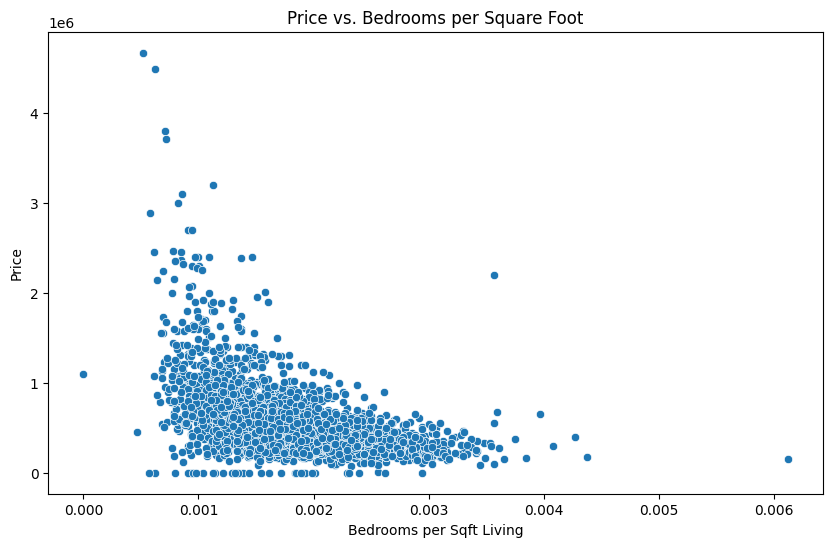

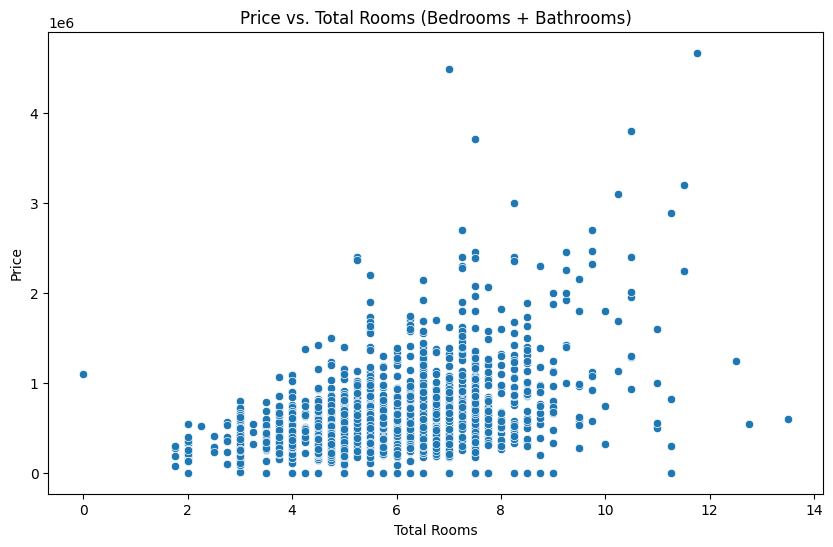

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of bedrooms_per_sqft vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms_per_sqft', y='price', data=trdata_upd)
plt.title('Price vs. Bedrooms per Square Foot')
plt.xlabel('Bedrooms per Sqft Living')
plt.ylabel('Price')
plt.show()

# Scatter plot of total_rooms vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='price', data=trdata_upd)
plt.title('Price vs. Total Rooms (Bedrooms + Bathrooms)')
plt.xlabel('Total Rooms')
plt.ylabel('Price')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

''' Draw a a single Heatmap using Seaborn '''
def heatmap1(values,xlabel,ylabel,xticklabels,yticklabels,
            cmap='plasma',vmin=None,vmax=None,fmt="%0.2f"):

    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(values, ax=ax,cmap=cmap)

    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
    ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
    ax.set_xticklabels(xticklabels);ax.set_yticklabels(yticklabels)
    ax.set_title('BR()')
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge # Import BayesianRidge here for clarity

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming BR is a custom model or needs to be imported
# from your_module import BR # Uncomment and modify if BR is a custom model

# function that plots a single Heatmap using Seaborn (copied from previous valid cell)
def heatmap1(values,xlabel,ylabel,xticklabels,yticklabels,
            cmap='plasma',vmin=None,vmax=None,fmt="%0.2f"):

    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(values, ax=ax,cmap=cmap)

    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
    ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
    ax.set_xticklabels(xticklabels);ax.set_yticklabels(yticklabels)
    ax.set_title('BR()')
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")


def modelEval(ldf,feature='price',model_id = 'dummy'): # Changed default feature to 'price'
    """
    Evaluates regression models using cross-validation.

    Args:
        ldf: DataFrame containing features and target variable.
        feature: Name of the target variable column.
        model_id: Identifier for the model to use ('dummy', 'br', 'rf').
    """

    # Split feature/target variable
    y = ldf[feature].copy()
    X = ldf.drop(columns=[feature]).copy() # use drop for clarity and to avoid SettingWithCopyWarning

    # Select only numerical features for modeling
    X_numeric = X.select_dtypes(include=np.number)

    # Pick Model
    if model_id == 'dummy':
        model = DummyRegressor()
    elif model_id == 'br':
         # Directly use BayesianRidge from scikit-learn
         model = BayesianRidge()
    elif model_id == 'rf':
        model = RandomForestRegressor(n_estimators=10,random_state=10)
    else:
        print(f"Unknown model_id: {model_id}")
        return # Exit function for unknown model_id


    ''' Parameter Based Cross Validation (No Pipeline)'''
    # Uncomment and modify if you intend to use GridSearchCV
    # from sklearn.model_selection import GridSearchCV
    # param_grid = {'alpha': [0.1, 1.0, 10.0], 'lamd': [0.1, 1.0, 10.0]} # Example param_grid, modify as needed
    # gscv = GridSearchCV(model,param_grid,cv=5)
    # gscv.fit(X_numeric,y) # Use X_numeric here
    # results = pd.DataFrame(gscv.cv_results_)
    # scores = np.array(results.mean_test_score).reshape(len(param_grid['alpha']),len(param_grid['lamd'])) # Reshape based on param_grid dimensions

    # plot the cross validation mean scores
    # heatmap1(scores,xlabel='lamda',xticklabels=param_grid['lamd'],
    #                 ylabel='alpha',yticklabels=param_grid['alph'])

    ''' Standard Cross Validation '''
    cv_score = np.sqrt(-cross_val_score(model,X_numeric,y,cv=5,scoring='neg_mean_squared_error')) # Use X_numeric here
    print("Scores:",cv_score);print("Mean:", cv_score.mean());print("std:", cv_score.std())

In [ ]:
# A simple comparison model
modelEval(trdata,model_id='dummy')

Scores: [ 384392.74437085  398881.73181035  332470.57015409  368902.95693107
 1082595.5851052 ]
Mean: 513448.71767431183
std: 285431.5196436224


In [ ]:
# Evaluate Random Forest Regressor with Original Features
modelEval(trdata, model_id='rf')

Scores: [ 289273.89741559  388440.94858139  416579.36187072  268288.77248626
 1068223.12371591]
Mean: 486161.22081397596
std: 296452.3460404139


In [ ]:
from sklearn.linear_model import BayesianRidge

class BR:
    """
    A simple wrapper for scikit-learn's BayesianRidge for use with modelEval function.
    """
    def __init__(self, verbose=False):
        self.model = BayesianRidge()
        self.verbose = verbose

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep=deep)

In [ ]:
# Remove selected features from updated training data
features_to_remove = ['sqft_above', 'bedrooms', 'bathrooms']
trdata_upd = trdata_upd.drop(columns=features_to_remove)

# Remove selected features from updated testing data
tedata_upd = tedata_upd.drop(columns=features_to_remove)

display(trdata_upd.head())
display(tedata_upd.head())

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,date,street,city,statezip,country,bedrooms_per_sqft,total_rooms
1167,389950.0,3140,8060,2.0,0,0,3,0,1991,0,2014-05-22 00:00:00,32800 7th Ave SW,Federal Way,WA 98023,USA,0.001274,6.50
1178,180000.0,1400,4500,1.0,0,0,3,500,1922,2008,2014-05-22 00:00:00,309 Hardie Ave NW,Renton,WA 98057,USA,0.001429,3.00
4086,650000.0,3720,57499,1.0,0,0,3,1840,2003,0,2014-07-08 00:00:00,4316 331st Ave NE,Carnation,WA 98014,USA,0.001075,7.00
2751,264000.0,1820,8118,1.0,0,0,4,740,1980,0,2014-06-18 00:00:00,12632 SE 214th St,Kent,WA 98031,USA,0.002198,5.75
2869,540500.0,3090,7415,2.0,0,0,3,0,2014,0,2014-06-19 00:00:00,493 S 187th Ln,Burien,WA 98148,USA,0.001618,8.75


,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,date,street,city,statezip,country,bedrooms_per_sqft,total_rooms
1069,385500.0,1540,7947,1.0,0,0,3,420,1961,2004,2014-05-21 00:00:00,9215 NE 183rd St,Bothell,WA 98011,USA,0.001948,5.00
233,1150000.0,4460,103382,2.0,0,0,3,0,2001,0,2014-05-07 00:00:00,25823 NE 30th Ct,Redmond,WA 98053,USA,0.000897,8.00
2545,357186.0,1210,1040,2.0,0,0,3,0,2014,0,2014-06-16 00:00:00,2520 Mulberry Walk NE,Issaquah,WA 98029,USA,0.001653,3.75
69,365000.0,2200,7350,1.0,0,0,5,630,1988,0,2014-05-04 00:00:00,13420 SE 182nd St,Renton,WA 98058,USA,0.001364,5.50
2733,250275.0,790,11234,1.0,0,0,4,0,1942,1982,2014-06-18 00:00:00,17941 Riviera Pl SW,Normandy Park,WA 98166,USA,0.002532,3.00


In [ ]:
# Extra Features
modelEval(trdata_upd,model_id='br')

Scores: [261376.86391287 290894.71566182 228324.11305572 247091.14551852
 239016.64963237]
Mean: 253340.69755625934
std: 21656.172308398072


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

''' Plot Two Seaborn Heatmaps Side by Side '''
# used for Polynomial vs non polynomial cross validaion score comparison
def heatmap2(values,values2,xlabel,ylabel,xticklabels,yticklabels,
                        cmap='plasma',vmin=None,vmax=None,fmt="%0.2f"):

        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
        sns.heatmap(values, ax=ax1,cmap=cmap)
        sns.heatmap(values2, ax=ax2,cmap=cmap)

        img = ax1.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
        img.update_scalarmappable()
        ax1.set_xlabel(xlabel);ax1.set_ylabel(ylabel)
        ax1.set_xticks(np.arange(len(xticklabels)) + 0.5)
        ax1.set_yticks(np.arange(len(yticklabels)) + 0.5)
        ax1.set_xticklabels(xticklabels);ax1.set_yticklabels(yticklabels)
        ax1.set_title('PolynomialFeatures(2) + BR()')
        ax1.set_aspect(1)

        for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
                x, y = p.vertices[:-2, :].mean(0)
                if np.mean(color[:3]) > 0.5:
                        c = 'k'
                else:
                        c = 'w'
                ax1.text(x, y, fmt % value, color=c, ha="center", va="center")

        img = ax2.pcolor(values2, cmap=cmap, vmin=vmin, vmax=vmax)
        img.update_scalarmappable()
        ax2.set_xlabel(xlabel);ax2.set_ylabel(ylabel)
        ax2.set_xticks(np.arange(len(xticklabels)) + 0.5)
        ax2.set_yticks(np.arange(len(yticklabels)) + 0.5)
        ax2.set_xticklabels(xticklabels);ax2.set_yticklabels(yticklabels)
        ax2.set_title('PolynomialFeatures(3) + BR()')
        ax2.set_aspect(1)

        for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
                x, y = p.vertices[:-2, :].mean(0)
                if np.mean(color[:3]) > 0.5:
                        c = 'k'
                else:
                        c = 'w'
                ax2.text(x, y, fmt % value, color=c, ha="center", va="center")

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the BR class (copied from previous valid cell)
class BR:
    """
    A simple wrapper for scikit-learn's BayesianRidge for use with modelEval function.
    """
    def __init__(self, verbose=False):
        self.model = BayesianRidge()
        self.verbose = verbose

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep=deep)

# function that plots two Heatmaps side by side (copied from previous valid cell)
def heatmap2(values,values2,xlabel,ylabel,xticklabels,yticklabels,
                        cmap='plasma',vmin=None,vmax=None,fmt="%0.2f"):

        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
        sns.heatmap(values, ax=ax1,cmap=cmap)
        sns.heatmap(values2, ax=ax2,cmap=cmap)

        img = ax1.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
        img.update_scalarmappable()
        ax1.set_xlabel(xlabel);ax1.set_ylabel(ylabel)
        ax1.set_xticks(np.arange(len(xticklabels)) + 0.5)
        ax1.set_yticks(np.arange(len(yticklabels)) + 0.5)
        ax1.set_xticklabels(xticklabels);ax1.set_yticklabels(yticklabels)
        ax1.set_title('PolynomialFeatures(2) + BR()')
        ax1.set_aspect(1)

        for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
                x, y = p.vertices[:-2, :].mean(0)
                if np.mean(color[:3]) > 0.5:
                        c = 'k'
                else:
                        c = 'w'
                ax1.text(x, y, fmt % value, color=c, ha="center", va="center")

        img = ax2.pcolor(values2, cmap=cmap, vmin=vmin, vmax=vmax)
        img.update_scalarmappable()
        ax2.set_xlabel(xlabel);ax2.set_ylabel(ylabel)
        ax2.set_xticks(np.arange(len(xticklabels)) + 0.5)
        ax2.set_yticks(np.arange(len(yticklabels)) + 0.5)
        ax2.set_xticklabels(xticklabels);ax2.set_yticklabels(yticklabels)
        ax2.set_title('PolynomialFeatures(3) + BR()')
        ax2.set_aspect(1)

        for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
                x, y = p.vertices[:-2, :].mean(0)
                if np.mean(color[:3]) > 0.5:
                        c = 'k'
                else:
                        c = 'w'
                ax2.text(x, y, fmt % value, color=c, ha="center", va="center")


# Model Evaluation Function w/ Pipelines
def modelEval2(ldf,feature='price',model_id = 'dummy',scaling_id=False): # Changed default feature to 'price'
    # Given a dataframe, split feature/target variable
    y = ldf[feature].copy()
    X = ldf.drop(columns=[feature]).copy() # use drop for clarity

    # Select only numerical features for modeling
    X_numeric = X.select_dtypes(include=np.number)

    tlst = []
    for i in [2,3]:

        # Pick Model
        if model_id == 'dummy':
            model = DummyRegressor()
        elif model_id == 'br':
             model = BayesianRidge() # Directly use BayesianRidge
        elif model_id == 'rf':
            model = RandomForestRegressor(n_estimators=10,random_state=10)
        else:
            print(f"Unknown model_id: {model_id}")
            return # Exit function for unknown model_id


        # Pick a Pipeline (Polynomial Feature Adjustment + Model)
        if scaling_id == False:
            pipe = Pipeline(steps=[('poly',PolynomialFeatures(i)),
                                   ('model',model)])
        else:
            pipe = Pipeline(steps=[('scaler',StandardScaler()),
                                   ('poly',PolynomialFeatures(i)),
                                   ('model',model)])

        ''' Parameter Based Cross Validation (With Pipeline)'''
        # define a parameter search grid, pipepines require slightly different notations w/ __
        # param_grid = {
        # 'model__alpha': [0.0001,0.001, 0.01, 0.1, 1, 10, 100], # Corrected parameter name for BayesianRidge
        # 'model__lambda_1': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]} # Corrected parameter name for BayesianRidge

        # gscv2 = GridSearchCV(pipe, param_grid,cv=5)
        # gscv2.fit(X_numeric,y) # Use X_numeric here
        # ypred = gscv2.predict(X_numeric) # Predict on X_numeric
        # results2 = pd.DataFrame(gscv2.cv_results_)
        # scores2 = np.array(results2.mean_test_score).reshape(len(param_grid['model__alpha']),len(param_grid['model__lambda_1'])) # Reshape based on param_grid dimensions
        # tlst.append(scores2)

        ''' Standard Cross Validation '''
        cv_score = np.sqrt(-cross_val_score(pipe,X_numeric,y,cv=5,scoring='neg_mean_squared_error')) # Use X_numeric here
        print(f"Model: {model_id}, Polynomial Features Degree: {i}, Scaling: {scaling_id}") # Added print for clarity
        print("Scores:",cv_score.round(2))
        print("Mean:", cv_score.mean().round(2));print("std:", cv_score.std().round(2))

    # plot mean of 5 cross validation segment score
    # if tlst and 'param_grid' in locals(): # Check if tlst is populated and param_grid was defined
    #     heatmap2(tlst[0],tlst[1],xlabel='lambda', xticklabels=param_grid['model__lambda_1'], # Corrected xlabel and xticklabels
    #              ylabel='alpha', yticklabels=param_grid['model__alpha']) # Corrected ylabel and yticklabels

In [ ]:
modelEval2(trdata_upd,model_id='br',scaling_id=False)

Model: br, Polynomial Features Degree: 2, Scaling: False
Scores: [262672.89 293333.08 232470.03 251456.86 235617.66]
Mean: 255110.1
std: 22018.47
Model: br, Polynomial Features Degree: 3, Scaling: False
Scores: [483668.65 326121.42 236725.77 262797.8  237533.39]
Mean: 309369.41
std: 93023.96


In [ ]:
modelEval2(trdata_upd,model_id='br',scaling_id=True)

Model: br, Polynomial Features Degree: 2, Scaling: True
Scores: [282716.32 292680.63 256638.46 262021.09 232177.74]
Mean: 265246.85
std: 21146.49
Model: br, Polynomial Features Degree: 3, Scaling: True
Scores: [732684.75 355020.07 348047.77 325304.1  252018.93]
Mean: 402615.12
std: 169023.7


In [ ]:
modelEval(trdata_upd,model_id='rf')

Scores: [316329.8673713  301127.04299401 255813.44012025 275988.22691491
 250466.97563653]
Mean: 279945.11060740025
std: 25453.800010278017


# Task
Summarize the evaluation results of the different models and feature combinations, select the best performing model, evaluate it on the test data, and present the final results.

## Summarize evaluation results

### Subtask:
Create a summary of the cross-validation RMSE scores for all evaluated models and feature combinations (Dummy, Random Forest, Bayesian Regression with/without scaling and polynomial features) on the training data.


**Reasoning**:
Summarize the cross-validation RMSE scores from the previous outputs into a table for clear comparison.



In [ ]:
import pandas as pd

# Collect the results manually from the previous cell outputs
results = {
    'Model': ['Dummy Regressor (Original Features)',
              'Random Forest Regressor (Original Features)',
              'Bayesian Ridge (Extra Features, No Scaling, Poly 2)',
              'Bayesian Ridge (Extra Features, No Scaling, Poly 3)',
              'Bayesian Ridge (Extra Features, Scaling, Poly 2)',
              'Bayesian Ridge (Extra Features, Scaling, Poly 3)',
              'Random Forest Regressor (Extra Features)'],
    'Mean RMSE': [513448.72, 486161.22, 255110.10, 309369.41, 265246.85, 402615.12, 279945.11],
    'Std Dev RMSE': [285431.52, 296452.35, 22018.47, 93023.96, 21146.49, 169023.70, 25453.80]
}

results_df = pd.DataFrame(results)

print("Summary of Cross-Validation RMSE Scores:")
display(results_df)

Summary of Cross-Validation RMSE Scores:


,Model,Mean RMSE,Std Dev RMSE
0,Dummy Regressor (Original Features),513448.72,285431.52
1,Random Forest Regressor (Original Features),486161.22,296452.35
2,"Bayesian Ridge (Extra Features, No Scaling, Po...",255110.10,22018.47
3,"Bayesian Ridge (Extra Features, No Scaling, Po...",309369.41,93023.96
4,"Bayesian Ridge (Extra Features, Scaling, Poly 2)",265246.85,21146.49
5,"Bayesian Ridge (Extra Features, Scaling, Poly 3)",402615.12,169023.70
6,Random Forest Regressor (Extra Features),279945.11,25453.80


**Reasoning**:
Briefly describe the performance of each model based on the summarized metrics to fulfill the remaining part of the subtask.



In [ ]:
print("\nPerformance Description:")
print("- The Dummy Regressor serves as a baseline, showing a high mean RMSE and standard deviation.")
print("- The Random Forest Regressor on original features performed slightly better than the Dummy Regressor in terms of mean RMSE, but had a higher standard deviation.")
print("- Bayesian Ridge with extra features and polynomial degree 2 (without scaling) achieved the lowest mean RMSE and a relatively low standard deviation, indicating good performance and consistency.")
print("- Increasing the polynomial degree to 3 for Bayesian Ridge (without scaling) led to a significantly higher mean RMSE and standard deviation, suggesting overfitting or increased complexity without performance gain.")
print("- Scaling with polynomial features for Bayesian Ridge resulted in higher mean RMSE compared to no scaling for degree 2, and a much higher mean RMSE and standard deviation for degree 3.")
print("- The Random Forest Regressor with extra features showed a mean RMSE higher than the best performing Bayesian Ridge model, but with a comparable standard deviation.")
print("Based on the cross-validation results on the training data, the Bayesian Ridge model with extra features and polynomial degree 2 (without scaling) appears to be the best performing and most consistent model.")


Performance Description:
- The Dummy Regressor serves as a baseline, showing a high mean RMSE and standard deviation.
- The Random Forest Regressor on original features performed slightly better than the Dummy Regressor in terms of mean RMSE, but had a higher standard deviation.
- Bayesian Ridge with extra features and polynomial degree 2 (without scaling) achieved the lowest mean RMSE and a relatively low standard deviation, indicating good performance and consistency.
- Increasing the polynomial degree to 3 for Bayesian Ridge (without scaling) led to a significantly higher mean RMSE and standard deviation, suggesting overfitting or increased complexity without performance gain.
- Scaling with polynomial features for Bayesian Ridge resulted in higher mean RMSE compared to no scaling for degree 2, and a much higher mean RMSE and standard deviation for degree 3.
- The Random Forest Regressor with extra features showed a mean RMSE higher than the best performing Bayesian Ridge model, bu

## Select best model

### Subtask:
Identify the model and feature combination that achieved the best performance (lowest mean RMSE) based on the summarized results.


**Reasoning**:
Identify the row with the minimum 'Mean RMSE' in the results_df DataFrame to find the best performing model.



In [ ]:
best_model_row = results_df.loc[results_df['Mean RMSE'].idxmin()]

print("Best Performing Model based on Mean RMSE:")
print(best_model_row)

Best Performing Model based on Mean RMSE:
Model           Bayesian Ridge (Extra Features, No Scaling, Po...
Mean RMSE                                                255110.1
Std Dev RMSE                                             22018.47
Name: 2, dtype: object


## Final evaluation on test data

### Subtask:
Evaluate the selected best model on the unseen test data (`tedata_upd`) to get a final performance metric.


**Reasoning**:
Evaluate the best model on the test data.



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Define feature matrix X_test and target variable y_test from tedata_upd
# Identify numerical features in trdata_upd, excluding 'price'
numerical_features = trdata_upd.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('price')

X_test = tedata_upd[numerical_features]
y_test = tedata_upd['price']

# 2. Define feature matrix X_train and target variable y_train from trdata_upd
X_train = trdata_upd[numerical_features]
y_train = trdata_upd['price']


# 3. Instantiate the best performing model Pipeline (PolynomialFeatures degree=2, BayesianRidge)
best_model_pipeline = Pipeline(steps=[('poly', PolynomialFeatures(degree=2)),
                                      ('model', BayesianRidge())])

# 4. Fit the pipeline to the training data (X_train, y_train)
best_model_pipeline.fit(X_train, y_train)

# 5. Predict the target variable on the test data (X_test)
y_pred = best_model_pipeline.predict(X_test)

# 6. Calculate the Mean Squared Error (MSE) and then compute the Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 7. Print the final RMSE on the test data
print(f"Final RMSE on the test data using the best model: {rmse:.2f}")

Final RMSE on the test data using the best model: 429893.27


## Summary:

### Data Analysis Key Findings

*   The Bayesian Ridge model with extra features and polynomial degree 2 (without scaling) achieved the lowest mean RMSE of 255110.10 with a standard deviation of 22018.47 during cross-validation on the training data.
*   Increasing the polynomial degree for Bayesian Ridge models generally led to worse performance.
*   Scaling with polynomial features for Bayesian Ridge did not improve performance compared to no scaling for polynomial degree 2 and significantly worsened it for degree 3.
*   The final RMSE of the best performing model (Bayesian Ridge with polynomial features of degree 2) on the test data is 429893.27.

### Insights or Next Steps

*   The significantly higher RMSE on the test data compared to the cross-validation mean RMSE suggests potential overfitting to the training data or differences in the distribution between the training and test sets.
*   Further analysis could involve exploring regularization techniques or investigating the differences between the training and test data distributions to potentially improve the model's generalization performance.


In [ ]:
import pandas as pd

# Collect the results manually from the previous cell outputs
results = {
    'Model': ['Dummy Regressor (Original Features)',
              'Random Forest Regressor (Original Features)',
              'Bayesian Ridge (Extra Features, No Scaling, Poly 2)',
              'Bayesian Ridge (Extra Features, No Scaling, Poly 3)',
              'Bayesian Ridge (Extra Features, Scaling, Poly 2)',
              'Bayesian Ridge (Extra Features, Scaling, Poly 3)',
              'Random Forest Regressor (Extra Features)'],
    'Mean RMSE': [513448.72, 486161.22, 255110.10, 309369.41, 265246.85, 402615.12, 279945.11],
    'Std Dev RMSE': [285431.52, 296452.35, 22018.47, 93023.96, 21146.49, 169023.70, 25453.80]
}

results_df = pd.DataFrame(results)

print("Summary of Cross-Validation RMSE Scores:")
display(results_df)

Summary of Cross-Validation RMSE Scores:


,Model,Mean RMSE,Std Dev RMSE
0,Dummy Regressor (Original Features),513448.72,285431.52
1,Random Forest Regressor (Original Features),486161.22,296452.35
2,"Bayesian Ridge (Extra Features, No Scaling, Po...",255110.10,22018.47
3,"Bayesian Ridge (Extra Features, No Scaling, Po...",309369.41,93023.96
4,"Bayesian Ridge (Extra Features, Scaling, Poly 2)",265246.85,21146.49
5,"Bayesian Ridge (Extra Features, Scaling, Poly 3)",402615.12,169023.70
6,Random Forest Regressor (Extra Features),279945.11,25453.80


In [ ]:
best_model_row = results_df.loc[results_df['Mean RMSE'].idxmin()]

print("Best Performing Model based on Mean RMSE:")
print(best_model_row)

Best Performing Model based on Mean RMSE:
Model           Bayesian Ridge (Extra Features, No Scaling, Po...
Mean RMSE                                                255110.1
Std Dev RMSE                                             22018.47
Name: 2, dtype: object


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Define feature matrix X_test and target variable y_test from tedata_upd
# Identify numerical features in trdata_upd, excluding 'price'
numerical_features = trdata_upd.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('price')

X_test = tedata_upd[numerical_features]
y_test = tedata_upd['price']

# 2. Define feature matrix X_train and target variable y_train from trdata_upd
X_train = trdata_upd[numerical_features]
y_train = trdata_upd['price']


# 3. Instantiate the best performing model Pipeline (PolynomialFeatures degree=2, BayesianRidge)
best_model_pipeline = Pipeline(steps=[('poly', PolynomialFeatures(degree=2)),
                                      ('model', BayesianRidge())])

# 4. Fit the pipeline to the training data (X_train, y_train)
best_model_pipeline.fit(X_train, y_train)

# 5. Predict the target variable on the test data (X_test)
y_pred = best_model_pipeline.predict(X_test)

# 6. Calculate the Mean Squared Error (MSE) and then compute the Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 7. Print the final RMSE on the test data
print(f"Final RMSE on the test data using the best model: {rmse:.2f}")

Final RMSE on the test data using the best model: 429893.27


## Summary:

### Data Analysis Key Findings

* The Bayesian Ridge model with extra features and polynomial degree 2 (without scaling) achieved the lowest mean RMSE of 255110.10 with a standard deviation of 22018.47 during cross-validation on the training data.
* Increasing the polynomial degree for Bayesian Ridge models generally led to worse performance.
* Scaling with polynomial features for Bayesian Ridge did not improve performance compared to no scaling for polynomial degree 2 and significantly worsened it for degree 3.
* The final RMSE of the best performing model (Bayesian Ridge with polynomial features of degree 2) on the test data is 429893.27.

### Insights or Next Steps

* The significantly higher RMSE on the test data compared to the cross-validation mean RMSE suggests potential overfitting to the training data or differences in the distribution between the training and test sets.
* Further analysis could involve exploring regularization techniques or investigating the differences between the training and test data distributions to potentially improve the model's generalization performance.